
# into

#### Library

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException

# ---------------------------------------------

from time import sleep
import requests

# ---------------------------------------------

import re

# ---------------------------------------------

import pandas as pd
import numpy as np

# ---------------------------------------------

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

%pylab inline
#% config InlineBackend.figure_format = 'svg'


from sklearn.linear_model import  Lasso, LassoCV, RidgeCV
from sklearn.metrics import r2_score

import itertools


Populating the interactive namespace from numpy and matplotlib


#### Variables

In [6]:
# Define agent to avoid any issue while read the data.

headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}

# ---------------------------------------------

# Set up Chrome options to read the data without any issues

chrome_options = Options()
chrome_options.add_argument('disable-notifications')
chrome_options.add_argument('--disable-infobars')
chrome_options.add_argument('start-maximized')
chrome_options.add_argument('user-data-dir=C:\\Users\\MoLTaHeB\\AppData\\Local\\Google\\Chrome\\User Data\\Default')
chrome_options.add_argument("disable-infobars")
chrome_options.add_experimental_option("prefs", {"profile.default_content_setting_values.notifications": 2 })

# ---------------------------------------------

# Define the URL for the top five league including Saudi League

base_url = [] 
base_url.append('https://www.transfermarkt.com/laliga/marktwerteverein/wettbewerb/ES1')
base_url.append('https://www.transfermarkt.com/saudi-professional-league/marktwerteverein/wettbewerb/SA1')
base_url.append('https://www.transfermarkt.com/ligue-1/marktwerteverein/wettbewerb/FR1')
base_url.append('https://www.transfermarkt.com/bundesliga/marktwerteverein/wettbewerb/L1')
base_url.append('https://www.transfermarkt.com/serie-a/marktwerteverein/wettbewerb/IT1')
base_url.append('https://www.transfermarkt.com/premier-league/marktwerteverein/wettbewerb/GB1')

# ---------------------------------------------

delay = 5 # Secods, this period between each time to read content of URL
Clubs = {} # Dictionary to Save the data from the URLs
sns.set() # Seaborn setting


#### Functions

In [7]:
def Clean_text(text):
    text = text.replace('%',"").replace(' years',"").replace('m',"").replace('€',"").replace('year',"").replace('s',"")
    return text
# ---------------------------------------------
def get_inf(t):
    club_info = []
    club_info.append(t.text)
    url = 'https://www.transfermarkt.com'+t.get('href')
    response=requests.get(url,headers=headers)
    soup=BeautifulSoup(response.content,'lxml')
    for j , i  in enumerate (soup.find_all('span', class_='dataValue')):
        if j != 6 and j != 5:
            if j == 4:
                z = re.sub('\D', '', i.text)
                club_info.append(Clean_text(z))
            elif j == 2:
                z = i.text[1:3]             
                club_info.append(Clean_text(z))
            else:
                club_info.append(Clean_text(i.text.strip()))
    Clubs[t.text] = club_info
# ---------------------------------------------
def Total_value(soup, club_name):
    x = soup.find_all('a', title=club_name)[-1].text.replace('€','').replace('m','').replace('\'','')
    if x.find("bn") != -1:
        x = x.replace('bn','')
        x = float(x) * 1000
    return (x)
# ---------------------------------------------
def League_Value(text_League_Value):
    unit = 1
    x = text_League_Value.split(':')[1]
    if x.find("bn") != -1:
        unit = 1000
    return float((re.findall("([0-9]+[,.]+[0-9]|[m])", x))[0]) *  unit
# ---------------------------------------------
def update_data(soup):
    for i, item_n in enumerate( soup.find_all('a', class_='vereinprofil_tooltip tooltipstered')):
            if item_n.text == '':
                continue
            else:
                get_inf(item_n)
                Clubs[item_n.text].append(League_Value (soup.find('div', class_='marktwert').text))
                Clubs[item_n.text].append(soup.find('h1', class_='spielername-profil').text) 
                Clubs[item_n.text].append(Total_value(soup,item_n.text))
# ---------------------------------------------
def Loading_Progress (i):
    Loading = '█████'
    Remening = '▒▒▒▒▒'
    Status = ''
    j = 0
    while j < i:
        Status += Loading
        j += 1
    j = 0
    while j < (6-i):
        Status += Remening
        j += 1
    print("Loading Data of League # " , i ,'|',Status,'| ' , int(round((i)/(6),2)*100) , '%','\n')                

#### Start Code

In [8]:
# invoke the webdriver
browser = webdriver.Chrome(executable_path = r'C:/Program Files (x86)/Google/Chrome/Application/chromedriver.exe', options = chrome_options)
print('Start Loading The Data .. W a i t i n g \n')
print('# ---------------------------------------------\n')
for i, site in enumerate (base_url):
    browser.get(site)
    try:
        WebDriverWait(browser, delay)
        sleep(delay)
        html = browser.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
        #print(html)
        soup = BeautifulSoup(html, "html.parser")
        update_data(soup)
        Loading_Progress(i+1)
    except TimeoutException:
        print ("Loading took too much time! \n Try again")
    
# close the automated browser

browser.close()
print('# ---------------------------------------------\n')
print('Loading All Data From Transfermarkt Site is Complated')

Start Loading The Data .. W a i t i n g 

# ---------------------------------------------

Loading Data of League #  1 | █████▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ |  17 % 

Loading Data of League #  2 | ██████████▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ |  33 % 

Loading Data of League #  3 | ███████████████▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ |  50 % 

Loading Data of League #  4 | ████████████████████▒▒▒▒▒▒▒▒▒▒ |  67 % 

Loading Data of League #  5 | █████████████████████████▒▒▒▒▒ |  83 % 

Loading Data of League #  6 | ██████████████████████████████ |  100 % 

# ---------------------------------------------

Loading All Data From Transfermarkt Site is Complated


In [29]:
All_Clubs = pd.DataFrame(Clubs).T  # Convert The Data From Dictionary to Data Frame
All_Clubs.columns = ['Club_Name', 'Squad', 'Avg_Age','Foreign_Player', 'National_Player', 'Stadium_Capacity' , 'Since_in_League', 'League_Value','League_Name','Club_Value']
All_Clubs = All_Clubs.reset_index()
Cols = All_Clubs.columns.tolist()
Cols = Cols[-1:] + Cols[:-1]
All_Clubs = All_Clubs[Cols]
All_Clubs = pd.concat([All_Clubs, pd.get_dummies(All_Clubs['League_Name'], drop_first=[True])], 1).groupby(['Club_Value','Club_Name', 'Squad', 'Avg_Age','Foreign_Player', 'National_Player', 'Stadium_Capacity' , 'Since_in_League', 'League_Value','League_Name']).sum().reset_index()
All_Clubs = All_Clubs.drop(columns=['League_Name', 'Club_Name'])
for i in  All_Clubs.columns.tolist():
    All_Clubs[i] = All_Clubs[i].apply(lambda x: float(x))

In [30]:
All_Clubs.head(5)

,Club_Value,Squad,Avg_Age,Foreign_Player,National_Player,Stadium_Capacity,Since_in_League,League_Value,LaLiga,Ligue 1,Premier League,Saudi Professional League,Serie A
0,1050.00,23.0,27.2,17.0,19.0,55017.0,20.0,8900.0,0.0,0.0,1.0,0.0,0.0
1,100.30,25.0,27.6,5.0,5.0,40500.0,1.0,4900.0,1.0,0.0,0.0,0.0,0.0
2,100.50,25.0,25.5,13.0,6.0,34000.0,13.0,4200.0,0.0,0.0,0.0,0.0,0.0
3,101.60,26.0,27.4,22.0,5.0,25144.0,27.0,4900.0,0.0,0.0,0.0,0.0,1.0
4,108.45,26.0,26.7,14.0,8.0,39211.0,3.0,4900.0,0.0,0.0,0.0,0.0,1.0


In [109]:
All_Clubs.rename({'Ligue 1': 'Ligue_1'}, axis=1, inplace=True)
All_Clubs.rename({'Premier League': 'Premier_League'}, axis=1, inplace=True)
All_Clubs.rename({'Saudi Professional League': 'Saudi_Professional_League'}, axis=1, inplace=True)
All_Clubs.rename({'Serie A': 'Serie_A'}, axis=1, inplace=True)

In [1211]:
X = All_Clubs.drop(columns=["Club_Value"])
Y = All_Clubs.loc[:,"Club_Value"]

In [111]:
All_Clubs.corr()

,Club_Value,Squad,Avg_Age,Foreign_Player,National_Player,Stadium_Capacity,Since_in_League,League_Value,LaLiga,Ligue_1,Premier_League,Saudi_Professional_League,Serie_A
Club_Value,1.000000,-0.307850,-0.010231,0.450073,0.832698,0.599930,0.615027,0.500873,0.019898,-0.106418,0.399365,-0.358124,0.020894
Squad,-0.307850,1.000000,-0.032076,-0.037985,-0.299826,-0.169635,-0.094434,-0.602443,-0.358108,-0.009954,-0.312977,0.621003,0.022283
Avg_Age,-0.010231,-0.032076,1.000000,-0.339195,-0.089598,-0.100701,-0.094515,-0.025564,0.344293,-0.426353,0.079840,0.304437,0.047391
Foreign_Player,0.450073,-0.037985,-0.339195,1.000000,0.616792,0.235482,0.248969,0.407187,-0.303229,0.120595,0.204476,-0.497663,0.283943
National_Player,0.832698,-0.299826,-0.089598,0.616792,1.000000,0.610073,0.558864,0.485501,-0.094731,-0.099096,0.328688,-0.408962,0.219559
Stadium_Capacity,0.599930,-0.169635,-0.100701,0.235482,0.610073,1.000000,0.659049,0.180353,0.037676,-0.094664,0.084334,-0.188779,0.027615
Since_in_League,0.615027,-0.094434,-0.094515,0.248969,0.558864,0.659049,1.000000,0.135208,0.133983,-0.009275,-0.027023,-0.234674,0.106092
League_Value,0.500873,-0.602443,-0.025564,0.407187,0.485501,0.180353,0.135208,1.000000,0.051790,-0.192834,0.804481,-0.704389,0.051790
LaLiga,0.019898,-0.358108,0.344293,-0.303229,-0.094731,0.037676,0.133983,0.051790,1.000000,-0.212766,-0.212766,-0.186379,-0.212766
Ligue_1,-0.106418,-0.009954,-0.426353,0.120595,-0.099096,-0.094664,-0.009275,-0.192834,-0.212766,1.000000,-0.212766,-0.186379,-0.212766


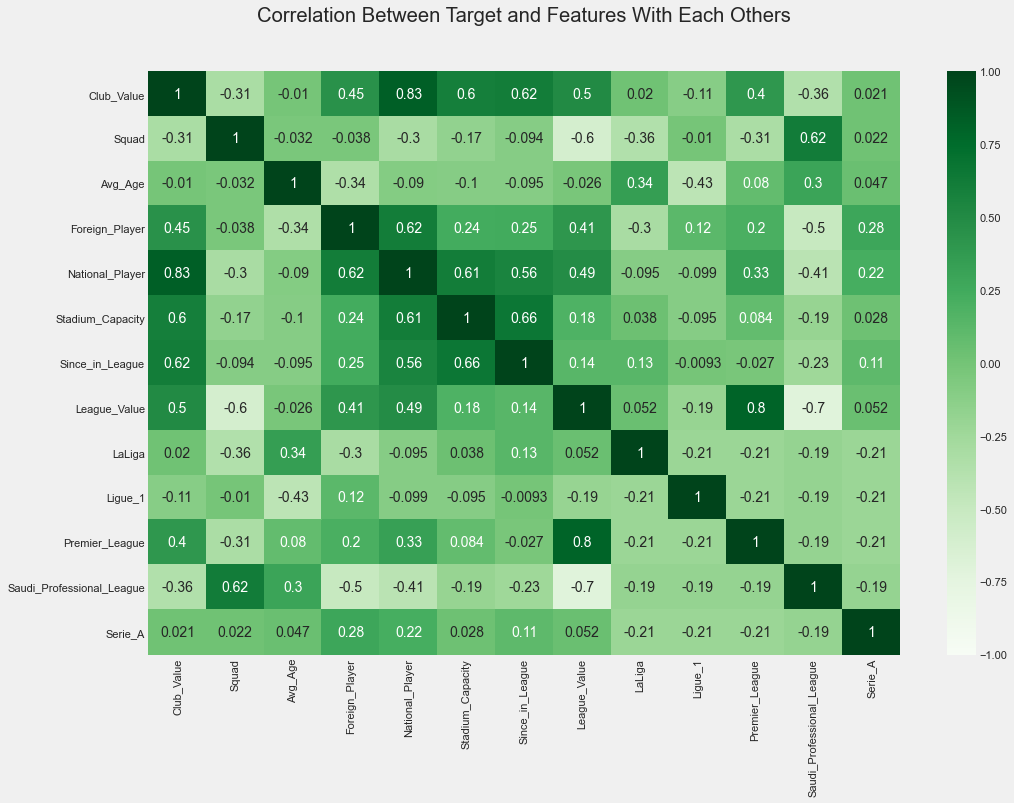

In [1505]:
fig, ax = plt.subplots(figsize=(15,10)) # Sample figsize in inches

sns.heatmap(All_Clubs.corr(), cmap="Greens", annot=True, vmin=-1, vmax=1, ax=ax);

ax.set_title('Correlation Between Target and Features With Each Others\n\n')
plt.show()

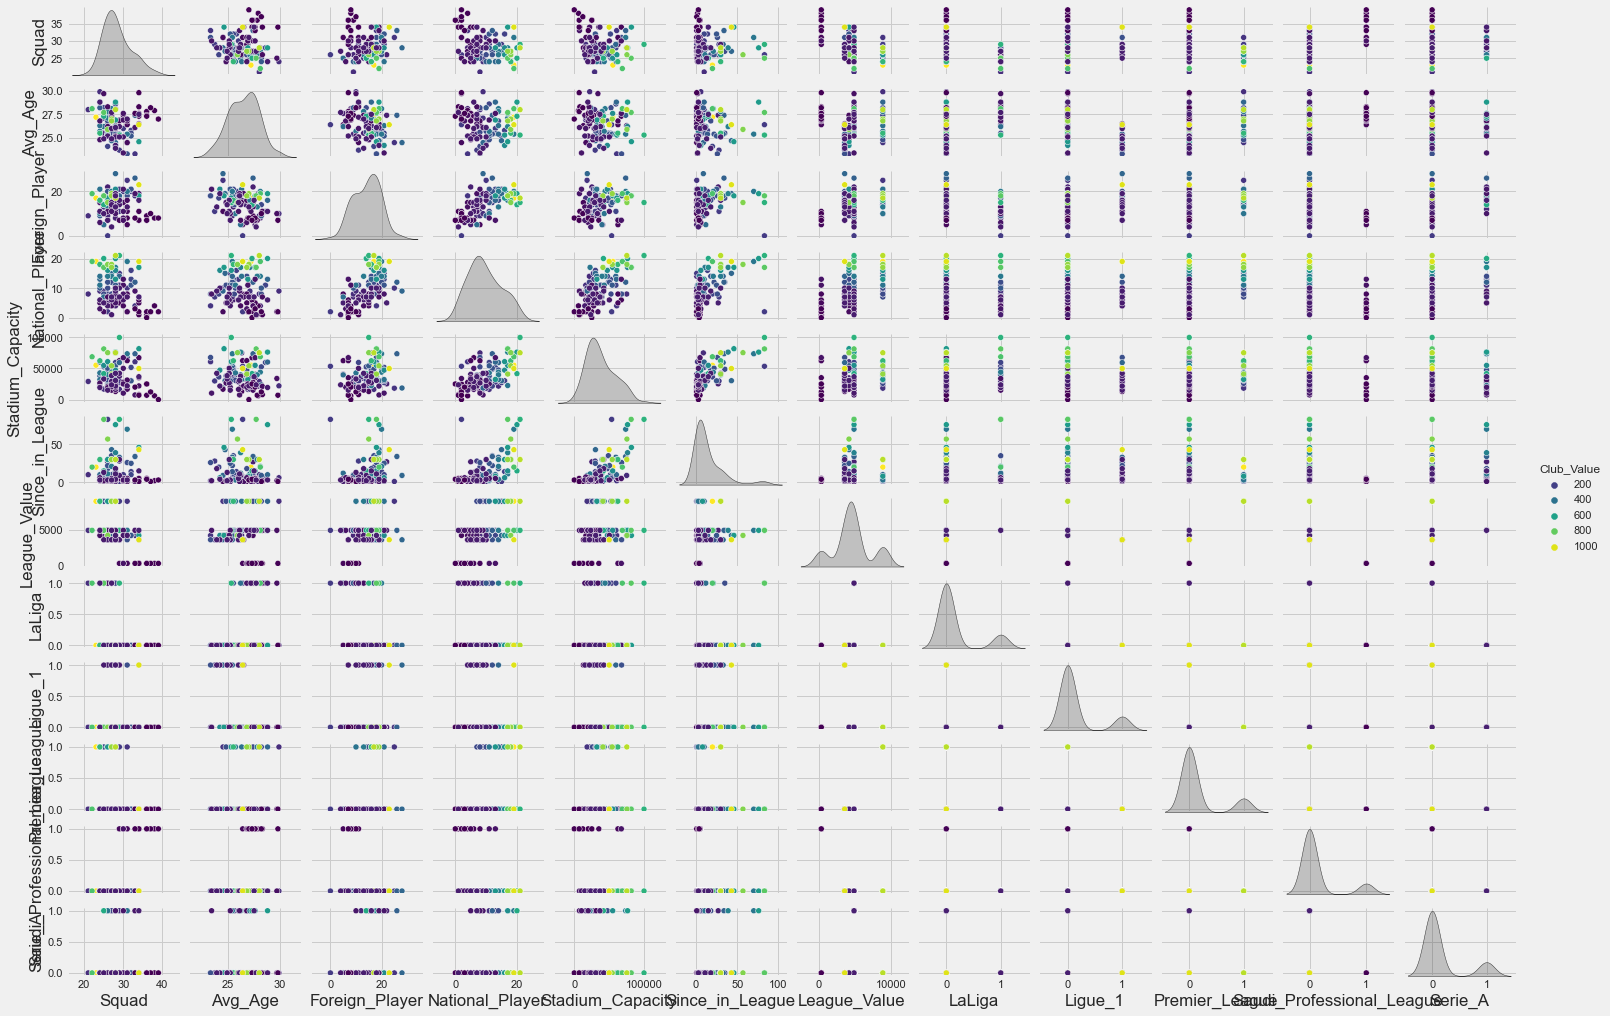

In [1502]:
sns.pairplot(All_Clubs, palette='viridis' , hue='Club_Value', height=1.2, aspect=1.5, diag_kws={"hue": None, "color": ".2"})

In [1212]:
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=95)

In [364]:
def Cross_Validation(lm, Filter_feature):
    mean_modle = []
    for i in range(20):
        X_train2, X_val, Y_train2, Y_val = train_test_split(X_train[Filter_feature], Y_train, test_size=.25)
        lm.fit(X_train2, Y_train2)
        t = round(lm.score(X_val, Y_val),2)
        #print(t)
        mean_modle.append(t)
    return np.mean(mean_modle)

In [365]:
l = ['Squad' , 'Avg_Age' , 'Foreign_Player' , 'National_Player' , 'Stadium_Capacity' , 'Since_in_League' , 'League_Value' , 'LaLiga' , 'Ligue_1' , 'Premier_League' , 'Saudi_Professional_League' , 'Serie_A']
lm = LinearRegression()
result = []
large = -99
for i in range(len(l)):
    p = (list(itertools.combinations(l, i+1)))
    for j in range (len(p)):
        #lm.fit(X_train2 [list(p[j])], Y_train2)
        t = Cross_Validation(lm,list(p[j]))
        if t >= large:
            large = t
            result = list(p[j])
print('done')

done


In [1213]:
result

['Squad',
 'Avg_Age',
 'National_Player',
 'Since_in_League',
 'League_Value',
 'Ligue_1',
 'Serie_A']

In [367]:
large

0.7610000000000001

In [368]:
lm.fit(X_train2[result], Y_train2)

LinearRegression()

In [369]:
lm.score(X_test[result],Y_test)

0.6851079864546147

In [370]:
pre = lm.predict(X_test[result])

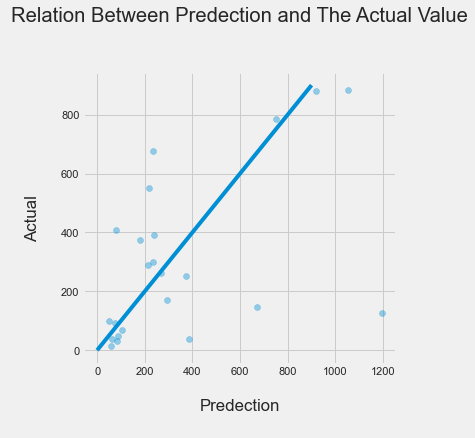

In [1509]:

plt.scatter(pre, Y_test, alpha=.4, cmap='GnBu_r')
plt.plot(np.linspace(0,900,500), np.linspace(0,900,500))
plt.title("Relation Between Predection and The Actual Value\n\n")
plt.xlabel("\nPredection\n")
plt.ylabel("\nActual\n")
plt.show()


In [906]:
def Cross_Validation_with_training_set(lm, X_train_set):
    mean_modle = []
    for i in range(20):
        X_train2, X_val, Y_train2, Y_val = train_test_split(X_train_set, Y_train, test_size=.25)
        lm.fit(X_train2, Y_train2)
        t = round(lm.score(X_val, Y_val),2)
        #print(t)
        mean_modle.append(t)
    return np.mean(mean_modle)

In [421]:
X_train_a = X_train[result].copy()
X_train_a['League_Value_Per_Player'] = X_train_a['League_Value'] / X_train_a['Squad'] 
Cross_Validation_with_training_set(lm,X_train_a)

0.712

In [422]:
X_train_a = X_train[result].copy()
X_train_a['Avg_Age_with_Squad'] = X_train_a['Avg_Age'] * X_train_a['Squad'] 
Cross_Validation_with_training_set(lm,X_train_a)

0.7560000000000001

In [423]:
X_train_a = X_train[result].copy()
X_train_a['League_Value_Per_Player'] = X_train_a['League_Value'] * X_train_a['Avg_Age'] 
Cross_Validation_with_training_set(lm,X_train_a)

0.6805

# -------------------------------------------------------------------------------

In [1236]:
X_train_P = X_train[result].copy()
Y_train_P = Y_train.copy()
X_test_P = X_test[result].copy()
Y_test_P = Y_test.copy()

In [1237]:
from sklearn.pipeline import make_pipeline

def Cross_Validation_with_training_set_for_poly(X_train_set,d):
    
    mean_modle2 = []
    
    for i in range(5):
        X_train2, X_val, Y_train2, Y_val = train_test_split(X_train_set, Y_train_P, test_size=.25)
        #X_train_poly = poly.fit_transform(X_train2.values)
        #X_val_poly = poly.transform(X_val.values)
        #lm_poly = LinearRegression()
        #lm_poly.fit(X_train_poly,Y_train2)
        polyreg=make_pipeline(PolynomialFeatures(d),LinearRegression())
        polyreg.fit(X_train2,Y_train2)
        t = round(polyreg.score(X_val,Y_val),2)
        #print ("t : ",t)
        mean_modle2.append(t)
        #print ("mean : ", mean_modle2)
    #print ("mean return : ", np.mean(mean_modle2))
    #print('# ---------------------------------------------')
    return np.mean(mean_modle2),polyreg

In [1255]:
degree = 0
large = -9999
d = 2
good_poly = 0 
good_lm_poly = 0 
good_polyreg
t = 0
for j in range(5):
    #print("here j" , j)
    poly = PolynomialFeatures(degree=d) 
    t,polyreg = Cross_Validation_with_training_set_for_poly(X_train_P,d)
    #print ("tttt : ", t)
    if t >= large:
        large = t
        degree = d
        good_poly = poly
        good_polyreg = polyreg
    #print ('Large : ', large, "| d : " , d)
    d += 1
print(large)
print('done')


0.694
done


In [1256]:
good_polyreg.score(X_test_P,Y_test_P)

0.6015767326835788

In [1257]:
pre_poly = good_polyreg.predict(X_test_P)

In [1258]:
pre_poly

array([ 378.69516781,  461.84463326,  724.7577677 ,   80.23331844,
       1150.7885179 ,  168.19983283,  152.89127437,   59.95045151,
         -9.7919433 ,  605.42033656,  271.19758989,  670.83292324,
        259.23455162,   28.32629301,  -98.38978875,   77.3025608 ,
         54.64578794,   81.63364947,  191.84614958,  429.42554342,
        128.50795939,   78.92119252,  208.84337704])

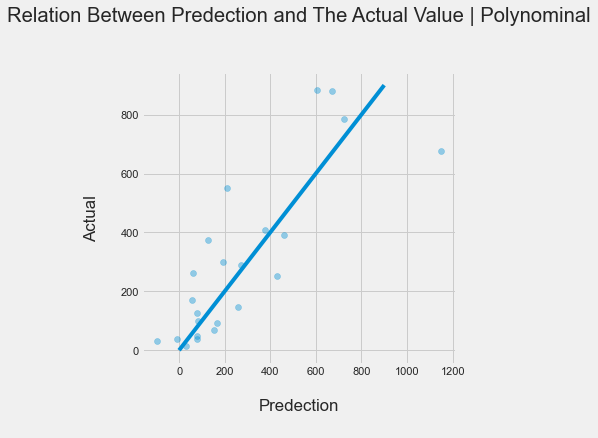

In [1512]:
plt.scatter(pre_poly, Y_test_P, alpha=.4, cmap='GnBu_r')
plt.plot(np.linspace(0,900,500), np.linspace(0,900,500))
plt.title("Relation Between Predection and The Actual Value | Polynominal\n\n")
plt.xlabel("\nPredection\n")
plt.ylabel("\nActual\n")
plt.show()

# ---------------------------------------- Ridge

In [1261]:
X_train_R = X_train[result].copy()
Y_train_R = Y_train.copy()
X_test_R = X_test[result].copy()
Y_test_R = Y_test.copy()

In [1262]:
X_train2, X_val, Y_train2, Y_val = train_test_split(X_train_R, Y_train_R, test_size=.25)

In [1308]:
def Cross_Validation_Ridget(a):
    mean_modle = []
    for i in range(20):
        #print('neny')
        X_train2, X_val, Y_train2, Y_val = train_test_split(X_train_R, Y_train_R, test_size=.25)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train2.values)
        X_val_scaled = scaler.transform(X_val.values)
        
        
        lm_reg = Ridge(alpha=a)
        
        lm_reg.fit(X_train_scaled, Y_train2)      

        t = lm_reg.score(X_val_scaled, Y_val)
        mean_modle.append(t)
    return np.mean(mean_modle)
#print(Cross_Validation_Ridget(10))

In [1309]:
large = -999
my_alpha = 1
for i in range(500):
    r = Cross_Validation_Ridget(i)    
    #print(r)
    if r >= large:
        large = r
        my_alpha = i

In [1310]:
print('L : ',large)
print('Alpha : ',my_alpha)

L :  0.7149696406608796
Alpha :  5


In [1311]:
lm_reg = Ridge(alpha=5)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2.values)
lm_reg.fit(X_train_scaled, Y_train2)

Ridge(alpha=5)

In [1312]:
X_test_scaled = scaler.transform(X_test_R.values)       


In [1313]:
lm_reg.score(X_test_scaled,Y_test_R)

0.740164091709562

In [1314]:
pred = lm_reg.predict(X_test_scaled)

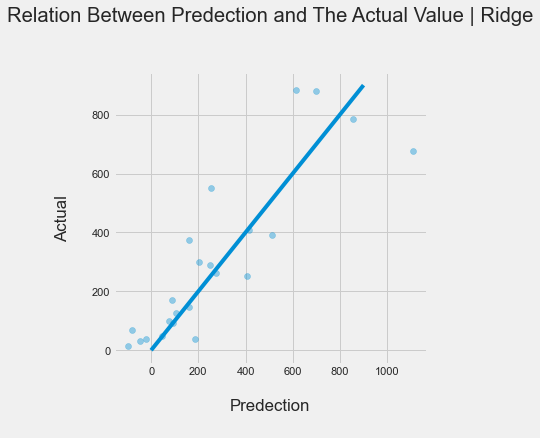

In [1513]:
plt.scatter(pred, Y_test_R, alpha=.4 ,  cmap='GnBu_r')
plt.plot(np.linspace(0,900,500), np.linspace(0,900,500))
plt.title("Relation Between Predection and The Actual Value | Ridge\n\n")
plt.xlabel("\nPredection\n")
plt.ylabel("\nActual\n")
plt.show()

#  ----------------------------- Lasso

In [1341]:
X_train_L = X_train[result].copy()
Y_train_L = Y_train.copy()
X_test_L = X_test[result].copy()
Y_test_L = Y_test.copy()

In [1342]:
X_train2, X_val, Y_train2, Y_val = train_test_split(X_train_L, Y_train_L, test_size=.25)

In [1343]:
def Cross_Validation_Lasso(a):
    mean_modle = []
    for i in range(20):
        
        X_train2, X_val, Y_train2, Y_val = train_test_split(X_train_L, Y_train_L, test_size=.25)

        lr_model_lasso = Lasso(alpha = a)
        lr_model_lasso.fit(X_train2, Y_train2)
        t = lr_model_lasso.score(X_val,Y_val)
        
        mean_modle.append(t)
    return np.mean(mean_modle)


In [1344]:
large_lasso = -999
my_alpha_lasso = 1
for i in range(500):
    r = Cross_Validation_Lasso(i+1)    
    if r >= large_lasso:
        large_lasso = r
        my_alpha_lasso = i+1
print('L : ',large_lasso)
print('Alpha : ',my_alpha_lasso)

L :  0.7272932093679823
Alpha :  4


In [1334]:
lr_model_lasso = Lasso(alpha = 11)
lr_model_lasso.fit(X_train_L, Y_train_L)
lr_model_lasso.score(X_test_L,Y_test_L)

0.7418941935752272

In [1335]:
pred_Lasso = lr_model_lasso.predict(X_test_L)

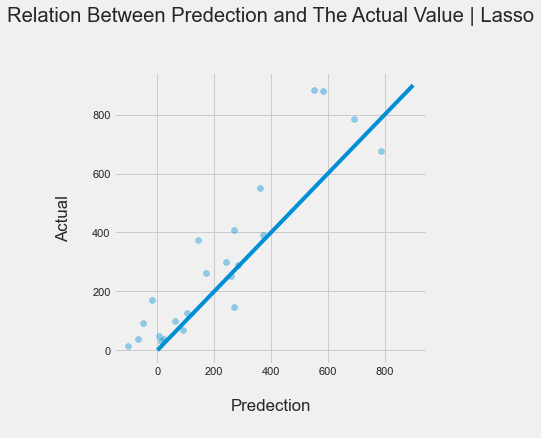

In [1514]:
plt.scatter(pred_Lasso, Y_test_L, alpha=.4 ,  cmap='GnBu_r')
plt.plot(np.linspace(0,900,500), np.linspace(0,900,500))

plt.title("Relation Between Predection and The Actual Value | Lasso\n\n")
plt.xlabel("\nPredection\n")
plt.ylabel("\nActual\n")
plt.show()

# ---------------------------------------------- Assumption 1


In [1374]:
X_train_A1 = X_train[result].copy()
Y_train_A1 = Y_train.copy()
import scipy.stats as stats


In [1375]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x) # "regression prediction"
    print(y.shape)
    plt.subplot(1, 3, 1)
    #plt.scatter(pred,y) # "scatter"
    plt.plot(np.linspace(0,700,500), np.linspace(0,700,500) , color="red")
    plt.scatter(pred, y, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res) # "scatter supposed to have no pattern"
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt) # "normal qq plot"
    plt.title("Normal Q-Q plot")

(91,)


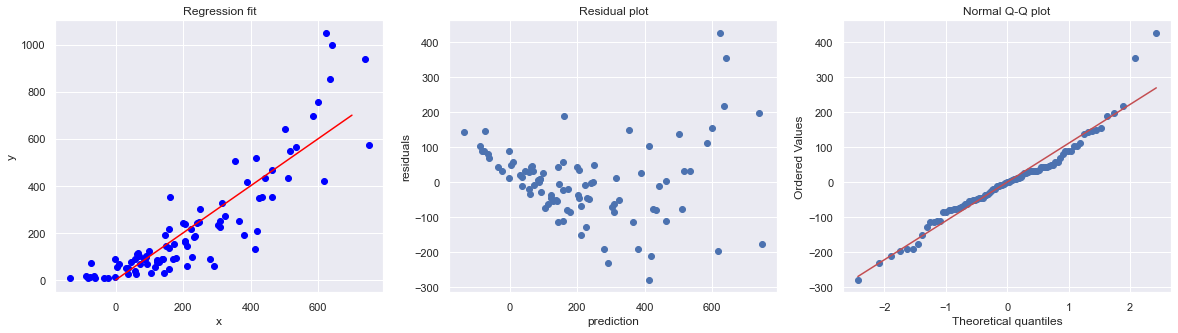

In [1376]:
diagnostic_plot(X_train_A, Y_train_A)

# ---------------------------------------------- Assumption 2


In [1379]:
X_train_A2 = X_train[result].copy()
Y_train_A2 = Y_train.copy()

In [1380]:
X_A2 = X_train_A2
Y_A2 = Y_train_A2   

In [1381]:
# develop OLS with Sklearn
lr = LinearRegression()
fit = lr.fit(X_A2,Y_A2) # for later use

In [1382]:
# Plot your predicted values on the x-axis, and your residuals on the y-axis

X_A2['predict']=fit.predict(X_A2)
X_A2['resid']= Y_A2 - X_A2.predict # "residuals"


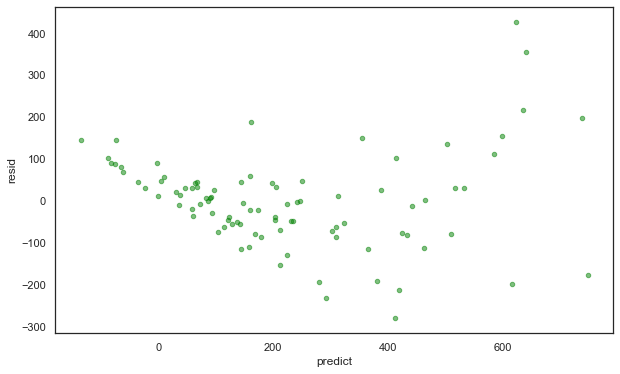

In [1394]:
with sns.axes_style('white'):
    plot=X_A2.plot(kind='scatter', x='predict',y='resid',alpha=0.5,figsize=(10,6), c= 'Green')

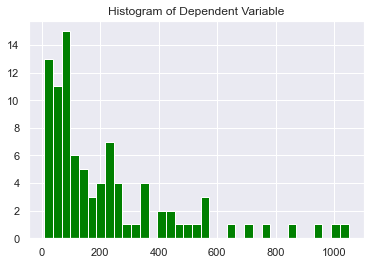

In [1399]:
Y_A2.hist(bins=35, color='green')
plt.title('Histogram of Dependent Variable');

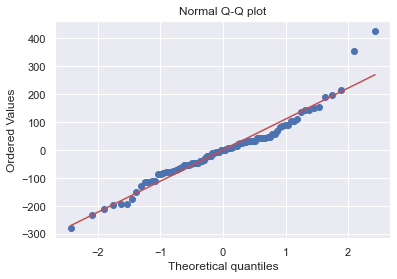

In [1400]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(X_A2['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# ---------------------------------------------- Assumption 3


In [1516]:
X_train_A3 = X_train[result].copy()
Y_train_A3 = Y_train.copy()

In [1517]:
model = sm.OLS(Y_train_A3,X_train_A3) # "from stats package"
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Club_Value   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                              81.90
Date:                Sun, 26 Sep 2021   Prob (F-statistic):                    8.13e-35
Time:                        08:17:38   Log-Likelihood:                         -561.14
No. Observations:                  91   AIC:                                      1136.
Df Residuals:                      84   BIC:                                      1154.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Squad              -5.0633      3.826     -1.323      0.189     -12.672       2.546
Avg_Age             0.9194      4.714      0.195      0.846      -8.455      10.294
National_Player    30.9406      3.187      9.708      0.000      24.602      37.279
Since_in_League     3.3374      0.874      3.817      0.000       1.599       5.076
League_Value        0.0049      0.007      0.716      0.476      -0.009       0.019
Ligue_1           -27.6494     32.622     -0.848      0.399     -92.522      37.223
Serie_A           -90.0663     33.083     -2.722      0.008    -155.856     -24.276
==============================================================================
Omnibus:                       23.500   Durbin-Watson:                   2.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.727
Skew:                           0.943   Prob(JB):                     2.62e-11
Kurtosis:                       6.048   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1518]:
# create residual plot
X_train_A3['predict'] = fit.predict(X_train_A3) # "we added the predication to the data frame"
X_train_A3['resid']= Y_train_A3 - X_train_A3.predict # "we added the residuals to the data frame"


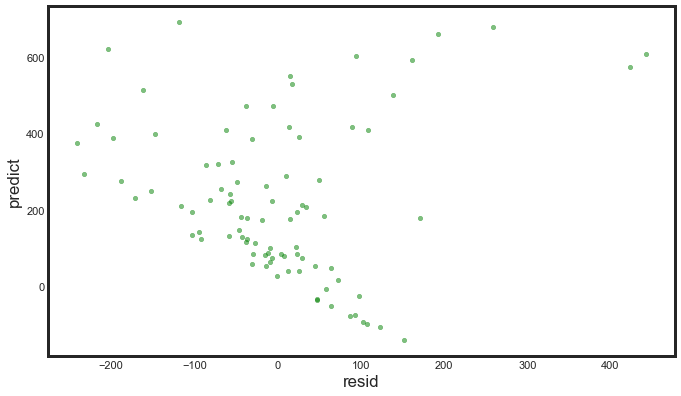

In [1519]:
with sns.axes_style('white'):
    plot = X_train_A3.plot( kind='scatter', x='resid', y='predict', alpha=0.5, figsize=(10,6), c='green')


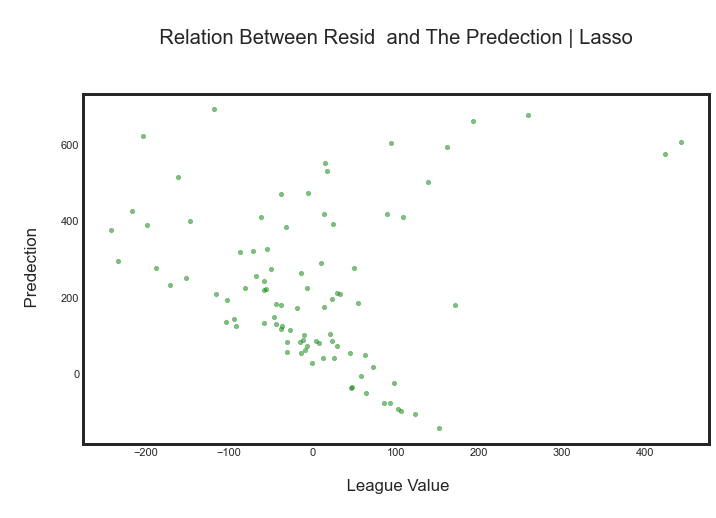

In [1536]:
with sns.axes_style('white'):
    plot = X_train_A3.plot( kind='scatter', x='resid', y='predict', alpha=0.5, figsize=(10,6), c='green')
    plt.title("\n  Relation Between Resid  and The Predection | Lasso  \n\n")
    plt.xlabel("\n League Value\n")
    plt.ylabel("\n Predection\n")
    plt.show()

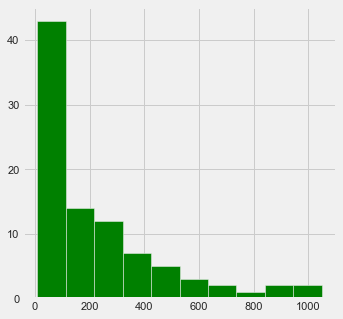

In [1528]:
# create histogram
Y_train_A3.hist(color='green');
title = 'Histogram for Actual Data'
#Y_train_A3.set_title(title)
# note the positive skew

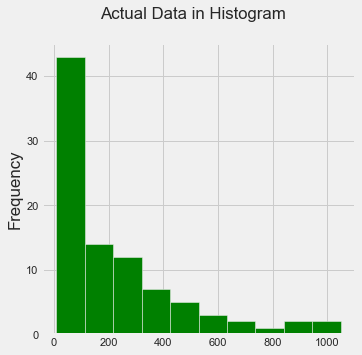

In [1530]:
ax = Y_train_A3.plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Actual Data in Histogram',color='green')

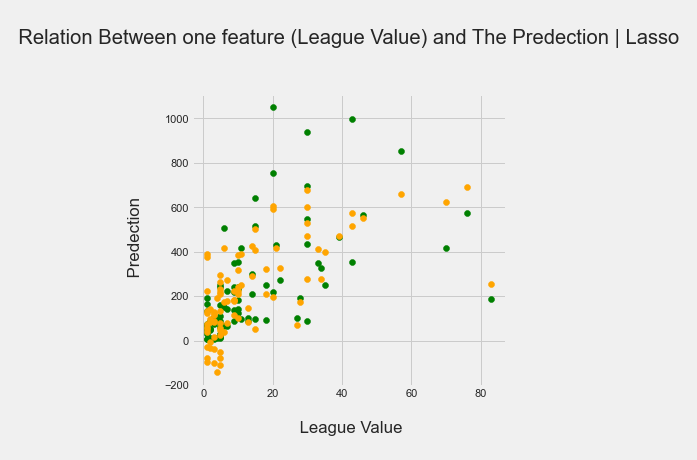

In [1525]:
# quick reg plot
plt.scatter(X_train_A3.Since_in_League,Y_train_A3, color ='green', label='Actual')
plt.scatter(X_train_A3.Since_in_League,X_train_A3.predict, color ='orange', label='Predector');
plt.title("\n  Relation Between one feature (League Value) and The Predection | Lasso  \n\n")
plt.xlabel("\n League Value\n")
plt.ylabel("\n Predection\n")
plt.show()

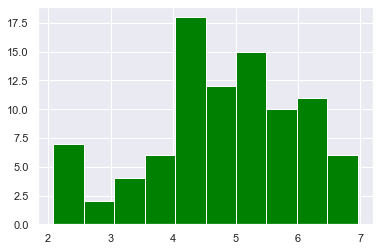

In [1426]:
# try log transformation
np.log(Y_train_A3).hist(color='green');

# it looks better but not very "normal"

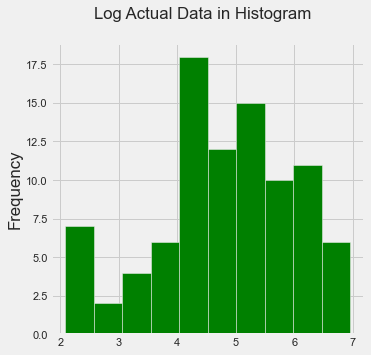

In [1532]:
ax = np.log(Y_train_A3).plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Log Actual Data in Histogram',color='green')

Lambda: 0.17772734850958308


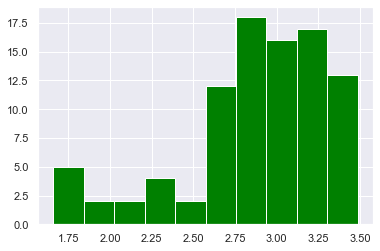

In [1434]:
lamb= stats.boxcox_normmax(Y_train_A3, brack=(-1.9, 1.9)) # "Compute optimal Box-Cox transform parameter for input data, brack for intilization"
print("Lambda:", lamb)
y_t=(np.power(Y_train_A3,-0.2282)-1)/-0.2282 # "the value of lambda is choosen from the box cox normality plot"

plt.hist(y_t, color = 'green');

Lambda: 0.17772734850958308


Text(0.5, 1.0, '\n  Lambda is choosen from the box cox Normality plot  \n')

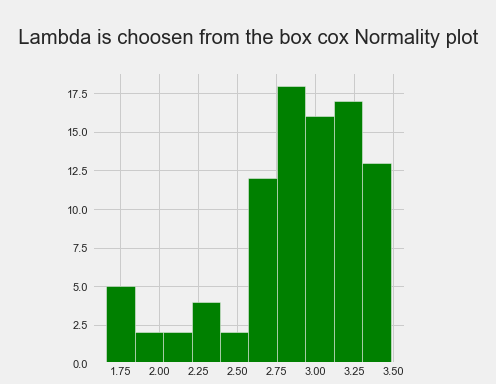

In [1534]:
lamb= stats.boxcox_normmax(Y_train_A3, brack=(-1.9, 1.9)) # "Compute optimal Box-Cox transform parameter for input data, brack for intilization"
print("Lambda:", lamb)
y_t=(np.power(Y_train_A3,-0.2282)-1)/-0.2282 # "the value of lambda is choosen from the box cox normality plot"

plt.hist(y_t, color = 'green');
plt.title('\n  Lambda is choosen from the box cox Normality plot  \n')

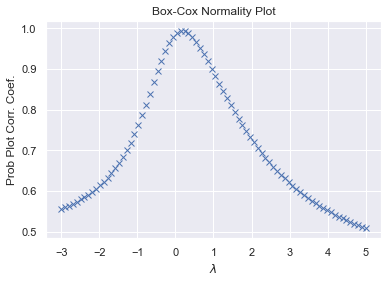

In [1438]:
# plot to show optimal lambda values
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(Y_train_A3, -3, 5, plot=ax) # "plots the correlation between the data before and after box cox transformation as a function on lambda"

# ---------------------------------------------- Assumption 4


In [ ]:
Not Applicaple because my data not related to time serius

# ---------------------------------------------- Assumption 5


In [1439]:
X_train_A3 = X_train[result].copy()
Y_train_A3 = Y_train.copy()

In [1440]:
X_train_A3.corr()

,Squad,Avg_Age,National_Player,Since_in_League,League_Value,Ligue_1,Serie_A
Squad,1.000000,0.055169,-0.300894,-0.115985,-0.600213,-0.039787,-0.013701
Avg_Age,0.055169,1.000000,-0.130559,-0.137484,-0.052355,-0.488347,0.099041
National_Player,-0.300894,-0.130559,1.000000,0.504045,0.474752,-0.094529,0.256509
Since_in_League,-0.115985,-0.137484,0.504045,1.000000,0.170963,-0.005877,0.160136
League_Value,-0.600213,-0.052355,0.474752,0.170963,1.000000,-0.170350,0.105040
Ligue_1,-0.039787,-0.488347,-0.094529,-0.005877,-0.170350,1.000000,-0.255085
Serie_A,-0.013701,0.099041,0.256509,0.160136,0.105040,-0.255085,1.000000


In [1442]:
mod_ols = sm.OLS(Y_train_A3, X_train_A3)
res_ols = mod_ols.fit()
res_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Club_Value   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                              81.90
Date:                Sat, 25 Sep 2021   Prob (F-statistic):                    8.13e-35
Time:                        23:56:06   Log-Likelihood:                         -561.14
No. Observations:                  91   AIC:                                      1136.
Df Residuals:                      84   BIC:                                      1154.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Squad              -5.0633      3.826     -1.323      0.189     -12.672       2.546
Avg_Age             0.9194      4.714      0.195      0.846      -8.455      10.294
National_Player    30.9406      3.187      9.708      0.000      24.602      37.279
Since_in_League     3.3374      0.874      3.817      0.000       1.599       5.076
League_Value        0.0049      0.007      0.716      0.476      -0.009       0.019
Ligue_1           -27.6494     32.622     -0.848      0.399     -92.522      37.223
Serie_A           -90.0663     33.083     -2.722      0.008    -155.856     -24.276
==============================================================================
Omnibus:                       23.500   Durbin-Watson:                   2.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.727
Skew:                           0.943   Prob(JB):                     2.62e-11
Kurtosis:                       6.048   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

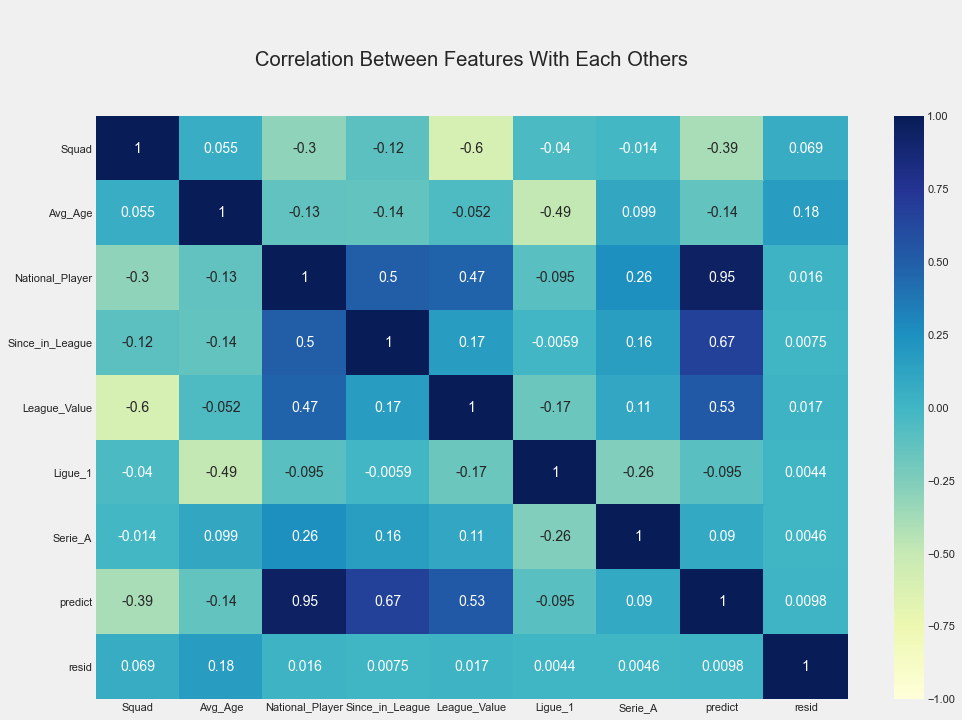

In [1527]:
fig, ax = plt.subplots(figsize=(15,10)) # Sample figsize in inches
sns.heatmap(X_train_A3.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1, ax=ax);

ax.set_title('\n\n   Correlation Between Features With Each Others   \n\n')
plt.show()